In [1]:
import os
import tensorflow.keras as keras

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# X : normalization
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Y : one-hot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

50000/50000 [==============================] - 1s 16us/sample - loss: 2.3042 - accuracy: 0.0973 - val_loss: 2.3050 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.3047 - accuracy: 0.0997 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.3042 - accuracy: 0.0994 - val_loss: 2.3034 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 0.4411 - accuracy: 0.8429 - val_loss: 2.0399 - val_accuracy: 0.5257
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.4279 - accuracy: 0.8474 - val_loss: 2.1922 - val_accuracy: 0.5221
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.4221 - accuracy: 0.8466 - val_loss: 2.1354 - val_accuracy: 0.5302
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.4071 - accuracy: 0.8524 - val_loss: 2.0917 - val_accuracy: 0.5330
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.3843 - accuracy: 0.8626 - val_loss: 2.2109 - val_accuracy: 0.5235
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.3819 - accuracy: 0.8633 - val_loss: 2.3501 - val_accuracy: 0.5175
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
L

50000/50000 [==============================] - 1s 16us/sample - loss: 0.9598 - accuracy: 0.6626 - val_loss: 1.3162 - val_accuracy: 0.5400
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9457 - accuracy: 0.6685 - val_loss: 1.4034 - val_accuracy: 0.5246
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9320 - accuracy: 0.6728 - val_loss: 1.4140 - val_accuracy: 0.5249
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9216 - accuracy: 0.6759 - val_loss: 1.3697 - val_accuracy: 0.5362
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9089 - accuracy: 0.6807 - val_loss: 1.3782 - val_accuracy: 0.5272
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.8948 - accuracy: 0.6861 - val_loss: 1.4147 - val_accuracy: 0.5306
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.8877 - accuracy: 0.6904 - va

50000/50000 [==============================] - 1s 16us/sample - loss: 1.6311 - accuracy: 0.4312 - val_loss: 1.6366 - val_accuracy: 0.4307
Epoch 40/50
50000/50000 [==============================] - 1s 15us/sample - loss: 1.6260 - accuracy: 0.4348 - val_loss: 1.6311 - val_accuracy: 0.4333
Epoch 41/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6209 - accuracy: 0.4357 - val_loss: 1.6263 - val_accuracy: 0.4346
Epoch 42/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6165 - accuracy: 0.4367 - val_loss: 1.6218 - val_accuracy: 0.4345
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6115 - accuracy: 0.4391 - val_loss: 1.6174 - val_accuracy: 0.4358
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6070 - accuracy: 0.4408 - val_loss: 1.6131 - val_accuracy: 0.4369
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6020 - accuracy: 0.4421 - va

50000/50000 [==============================] - 1s 16us/sample - loss: 1.9805 - accuracy: 0.3123 - val_loss: 1.9835 - val_accuracy: 0.3094
Epoch 37/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.9759 - accuracy: 0.3134 - val_loss: 1.9790 - val_accuracy: 0.3106
Epoch 38/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.9715 - accuracy: 0.3147 - val_loss: 1.9747 - val_accuracy: 0.3116
Epoch 39/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.9672 - accuracy: 0.3157 - val_loss: 1.9705 - val_accuracy: 0.3148
Epoch 40/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.9630 - accuracy: 0.3171 - val_loss: 1.9665 - val_accuracy: 0.3150
Epoch 41/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.9591 - accuracy: 0.3193 - val_loss: 1.9627 - val_accuracy: 0.3161
Epoch 42/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.9552 - accuracy: 0.3197 - va

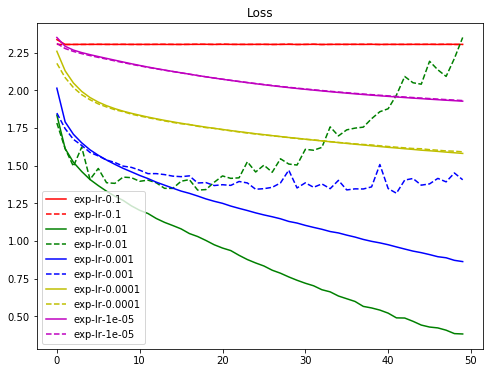

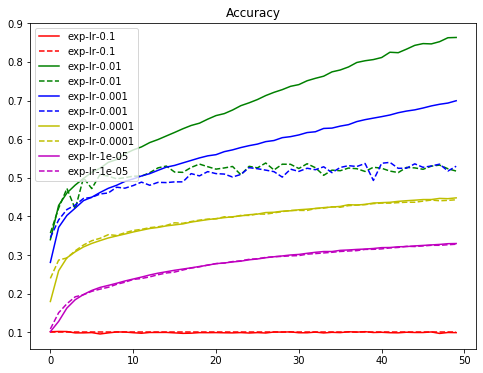

In [9]:
import matplotlib.pyplot as plt

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [10]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [12]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session()
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============

50000/50000 [==============================] - 1s 16us/sample - loss: 0.8213 - accuracy: 0.7034 - val_loss: 1.7633 - val_accuracy: 0.4983
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.8133 - accuracy: 0.7045 - val_loss: 1.8344 - val_accuracy: 0.5036
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.8086 - accuracy: 0.7081 - val_loss: 1.8924 - val_accuracy: 0.4814
Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 0.7721 - accuracy: 0.7280 - val_loss: 1.4150 - val_accuracy: 0.5449
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.7533 - accuracy: 0.7342 - val_loss: 1.3922 - val_accuracy: 0.5466
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.7437 - accuracy: 0.7383 - val_loss: 1.4639 - val_accuracy: 0.5335
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.7241 - accuracy: 0.7470 - val_loss: 1.5482 - val_accuracy: 0.5249
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.7167 - accuracy: 0.7481 - val_loss: 1.4197 - val_accuracy: 0.5493
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.7001 - accuracy: 0.7525 - val_loss: 1.4900 - val_accuracy: 0.5470
Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
L

50000/50000 [==============================] - 1s 16us/sample - loss: 1.4077 - accuracy: 0.5081 - val_loss: 1.4558 - val_accuracy: 0.4823
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.4030 - accuracy: 0.5098 - val_loss: 1.4470 - val_accuracy: 0.4879
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3960 - accuracy: 0.5120 - val_loss: 1.4576 - val_accuracy: 0.4844
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3926 - accuracy: 0.5132 - val_loss: 1.4399 - val_accuracy: 0.4899
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3825 - accuracy: 0.5167 - val_loss: 1.4438 - val_accuracy: 0.4856
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3771 - accuracy: 0.5175 - val_loss: 1.4531 - val_accuracy: 0.4883
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.3714 - accuracy: 0.5200 - va

50000/50000 [==============================] - 1s 16us/sample - loss: 1.8168 - accuracy: 0.3658 - val_loss: 1.8188 - val_accuracy: 0.3657
Epoch 40/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.8133 - accuracy: 0.3661 - val_loss: 1.8155 - val_accuracy: 0.3669
Epoch 41/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.8099 - accuracy: 0.3680 - val_loss: 1.8126 - val_accuracy: 0.3681
Epoch 42/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.8068 - accuracy: 0.3690 - val_loss: 1.8093 - val_accuracy: 0.3693
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.8034 - accuracy: 0.3697 - val_loss: 1.8060 - val_accuracy: 0.3720
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.8004 - accuracy: 0.3709 - val_loss: 1.8026 - val_accuracy: 0.3711
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.7971 - accuracy: 0.3723 - va

50000/50000 [==============================] - 1s 16us/sample - loss: 2.1518 - accuracy: 0.2373 - val_loss: 2.1497 - val_accuracy: 0.2444
Epoch 37/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.1487 - accuracy: 0.2383 - val_loss: 2.1466 - val_accuracy: 0.2460
Epoch 38/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.1456 - accuracy: 0.2407 - val_loss: 2.1435 - val_accuracy: 0.2481
Epoch 39/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.1426 - accuracy: 0.2415 - val_loss: 2.1405 - val_accuracy: 0.2497
Epoch 40/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.1396 - accuracy: 0.2432 - val_loss: 2.1375 - val_accuracy: 0.2508
Epoch 41/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.1366 - accuracy: 0.2452 - val_loss: 2.1346 - val_accuracy: 0.2516
Epoch 42/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.1336 - accuracy: 0.2467 - va

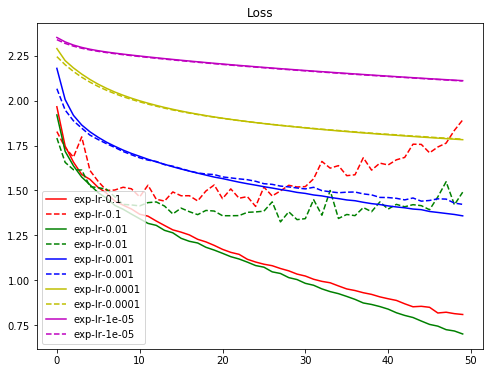

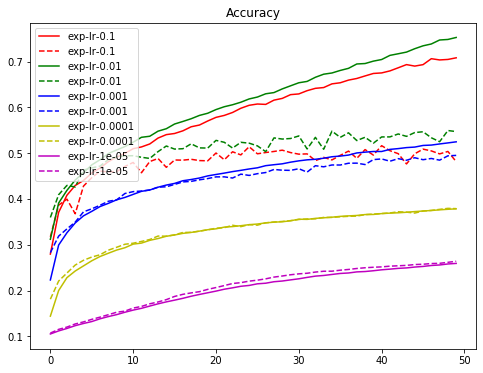

In [13]:
import matplotlib.pyplot as plt

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()